# First, I want to reduce the quality of the images.

# TEST

In [1]:
import os
import glob
import SimpleITK as sitk
import matplotlib.pyplot as plt

In [18]:
# Load the NRRD file
input_file = '\\\\zkh\\AppData\\RT-Meetdata\\GPTC\\13 Research & Testing\\DoseBasedPositioning\\Project_data\\Processed_CT_data\\Test\\DBP_OP009\\itr1\\DBP_OP009_pCTp0_itr1_.nrrd'
image = sitk.ReadImage(input_file)

# Define the downsampling factors (e.g., reduce to 50% of original size in each dimension)
downsampling_factors = [0.5, 0.5, 0.5]

# Get the original size and spacing
original_size = image.GetSize()
original_spacing = image.GetSpacing()
image_array = sitk.GetArrayFromImage(image)

# Calculate the new size
new_size = [int(round(osz * dsf)) for osz, dsf in zip(original_size, downsampling_factors)]
new_spacing = [osz * ospc / nsz for osz, ospc, nsz in zip(original_size, original_spacing, new_size)]

# Resample the image
resampled_image = sitk.Resample(image, new_size, sitk.Transform(), sitk.sitkLinear,
                                image.GetOrigin(), new_spacing, image.GetDirection(), 0, image.GetPixelID())


# Save the resampled image
output_file = 'output_file.nrrd'
sitk.WriteImage(resampled_image, output_file)

In [19]:
check_path = 'output_file.nrrd'

image_changed = sitk.ReadImage(check_path)

print(image_changed.GetSpacing())
print(image_changed.GetSize())
image_array_changed = sitk.GetArrayFromImage(image_changed)

(1.953125, 1.953125, 4.0)
(256, 256, 108)


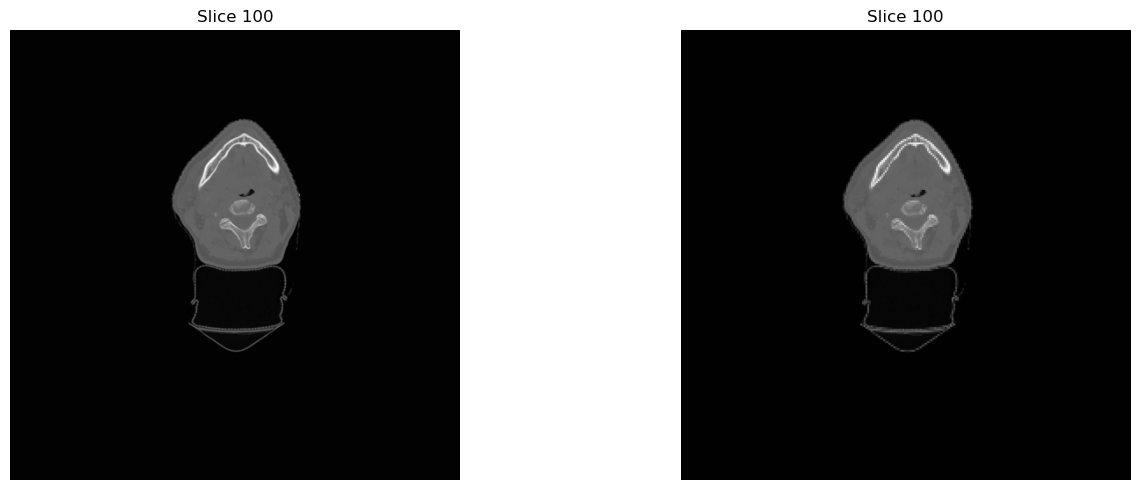

In [30]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

slice_index = 100
axes[0].imshow(image_array[slice_index, :, :], cmap='gray')
axes[0].set_title(f'Slice {slice_index}')
axes[0].axis('off')  # Hide the axis

axes[1].imshow(image_array_changed[int(slice_index / 2), :, :], cmap='gray')
axes[1].set_title(f'Slice {slice_index}')
axes[1].axis('off')  # Hide the axis


# Show the plot
plt.tight_layout()
plt.show()

# EXTENSION

In [70]:
def make_output_folder(root, output_root, link):

    name_ct = link.split('\\')[-1]
    part_link = link.replace(root,'')
    part_link = part_link.replace(name_ct,'')
    folder_path = os.path.join(output_root, part_link)
    os.makedirs(folder_path, exist_ok=True)

    # Make the image path
    output_image_path = os.path.join(folder_path, name_ct)

    return output_image_path

In [71]:
# # Load the NRRD file
# input_file = '\\\\zkh\\AppData\\RT-Meetdata\\GPTC\\13 Research & Testing\\DoseBasedPositioning\\Project_data\\Processed_CT_data\\Test\\DBP_OP009\\itr1\\DBP_OP009_pCTp0_itr1_.nrrd'

def resize_image(input_list, output_root, input_root):

    for input_file in input_list:
        image = sitk.ReadImage(input_file)

        # Define the downsampling factors (e.g., reduce to 50% of original size in each dimension)
        downsampling_factors = [0.5, 0.5, 0.5]

        # Get the original size and spacing
        original_size = image.GetSize()
        original_spacing = image.GetSpacing()
        image_array = sitk.GetArrayFromImage(image)

        # Calculate the new size
        new_size = [int(round(osz * dsf)) for osz, dsf in zip(original_size, downsampling_factors)]
        new_spacing = [osz * ospc / nsz for osz, ospc, nsz in zip(original_size, original_spacing, new_size)]

        # Resample the image
        resampled_image = sitk.Resample(image, new_size, sitk.Transform(), sitk.sitkLinear,
                                        image.GetOrigin(), new_spacing, image.GetDirection(), 0, image.GetPixelID())


        # # Save the resampled image
        # output_file = 'output_file.nrrd'

        # Make the output image path
        output_image_path = make_output_folder(input_root, output_root, input_file)

        sitk.WriteImage(resampled_image, output_image_path)

In [72]:
def navigate_folder(input_root):

    group = list()

    try:
        for r, d, f in os.walk(input_root):
            # make a list from all the directories 
            subfolders = [os.path.join(r, folder) for folder in d]

            for sub in subfolders:
                nrrd_files = glob.glob(os.path.join(sub, '*.nrrd'))
                nrrd_files = [file for file in nrrd_files if 'mask' not in file]

                group.extend(nrrd_files)
        
        return group
    except FileNotFoundError as e:
        print(f'Error while navigating folders in path {input_root}: {e}')
    


In [73]:
input_root = '\\\\zkh\\AppData\\RT-Meetdata\\GPTC\\13 Research & Testing\\DoseBasedPositioning\\Project_data\\Processed_CT_data\\nrrd\\'
output_root = '\\\\zkh\\AppData\\RT-Meetdata\\GPTC\\13 Research & Testing\\DoseBasedPositioning\\Project_data\\Processed_CT_data\\Test'

input_list = navigate_folder(input_root)
resize_image(input_list, output_root, input_root)

---
# Check data movement to the new directory


In [12]:
import shutil
import os

if not os.path.exists('//zkh/appdata/RTDicom/Projectline_HNC_modelling/Users/Hooman Bahrdo/Models/Deep_Learning/DL_NTCP_Xerostomia/experiments/test/AAA'):
    os.makedirs('//zkh/appdata/RTDicom/Projectline_HNC_modelling/Users/Hooman Bahrdo/Models/Deep_Learning/DL_NTCP_Xerostomia/experiments/test/AAA')
            
shutil.copytree('//zkh/appdata/RTDicom/Projectline_HNC_modelling/Users/Hooman Bahrdo/Models/Deep_Learning/DL_NTCP_Xerostomia/experiments/test/20240614_104434',
                '//zkh/appdata/RTDicom/Projectline_HNC_modelling/Users/Hooman Bahrdo/Models/Deep_Learning/DL_NTCP_Xerostomia/experiments/test/AAA'
                , dirs_exist_ok=True)

'//zkh/appdata/RTDicom/Projectline_HNC_modelling/Users/Hooman Bahrdo/Models/Deep_Learning/DL_NTCP_Xerostomia/experiments/test/AAA'